In [0]:
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
import os

In [0]:
!wget 'https://fyp-content-bucket.s3.amazonaws.com/Dataset.zip'

--2019-11-21 20:01:33--  https://fyp-content-bucket.s3.amazonaws.com/Dataset.zip
Resolving fyp-content-bucket.s3.amazonaws.com (fyp-content-bucket.s3.amazonaws.com)... 54.231.82.162
Connecting to fyp-content-bucket.s3.amazonaws.com (fyp-content-bucket.s3.amazonaws.com)|54.231.82.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4013338444 (3.7G) [application/zip]
Saving to: ‘Dataset.zip.2’

Dataset.zip.2       100%[===================>]   3.74G  37.0MB/s    in 1m 45s  

2019-11-21 20:03:19 (36.3 MB/s) - ‘Dataset.zip.2’ saved [4013338444/4013338444]



In [0]:
!unzip "Dataset.zip"

In [0]:
path = Path("/root/.fastai/data/MICC-F2000"); path

PosixPath('/root/.fastai/data/MICC-F2000')

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, ds_tfms = get_transforms(do_flip=False), size=224, bs=67)

Removed flip from transformation and increased image sizes

In [0]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (1340 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Authentic,Authentic,Authentic,Authentic,Authentic
Path: /root/.fastai/data/MICC-F2000;

Valid: LabelList (660 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Authentic,Authentic,Authentic,Authentic,Authentic
Path: /root/.fastai/data/MICC-F2000;

Test: None

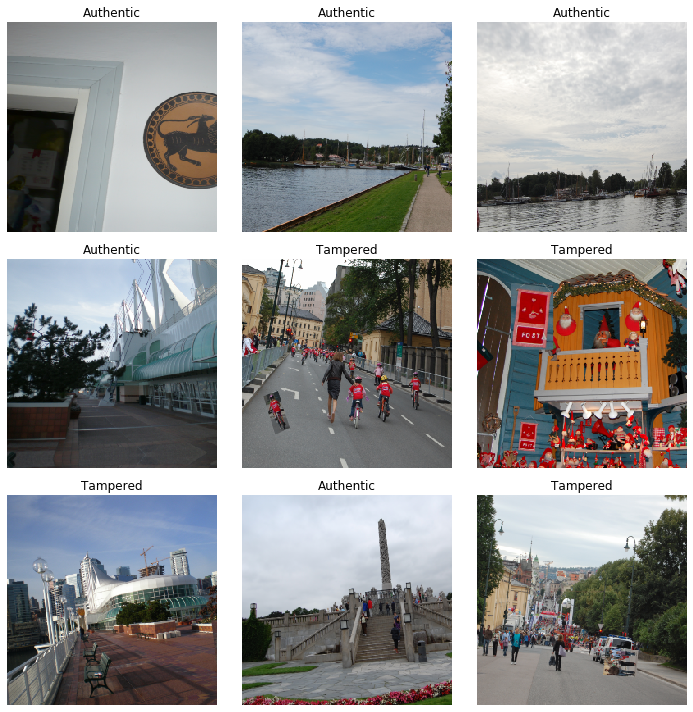

In [0]:
data.show_batch(rows=3, figsize=(10,10))

In [0]:
print(data.classes)
len(data.classes),data.c

['Authentic', 'Tampered']


(2, 2)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:04<00:00, 25.6MB/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


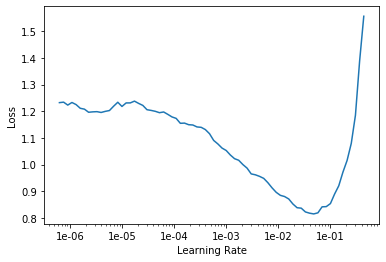

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
# learning rate
lr = 0.01

In [0]:
learn.fit_one_cycle(8, slice(lr))

epoch,train_loss,valid_loss,error_rate,time
0,0.815329,0.674336,0.172727,04:09
1,0.542325,0.334318,0.087879,03:59
2,0.418644,0.262992,0.050000,04:00
3,0.358659,0.281423,0.062121,04:04
4,0.305004,0.258494,0.065152,04:02
5,0.267113,0.195798,0.051515,04:04
6,0.218656,0.195829,0.036364,04:07
7,0.195108,0.200856,0.037879,04:12


In [0]:
learn.save('attempt-1-resnet50')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


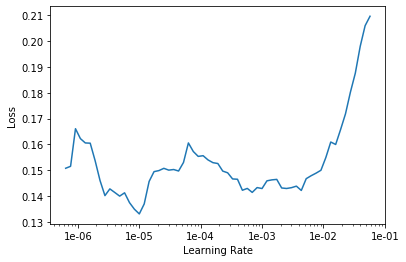

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(3, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,error_rate,time
0,0.228925,0.503663,0.092424,04:16
1,0.255616,0.217671,0.045455,04:10
2,0.203281,0.216301,0.034849,04:09


In [0]:
learn.save('attempt-2-50resnet')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.most_confused(min_val=2)

[('Authentic', 'Tampered', 40)]

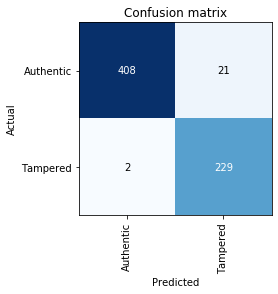

In [0]:
interp.plot_confusion_matrix()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


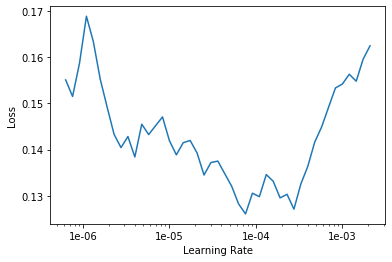

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)
learn.load('attempt-2-50resnet');

In [0]:
learn.unfreeze()
learn.fit_one_cycle(15, slice(1e-6, lr/10))

epoch,train_loss,valid_loss,error_rate,time
0,0.131906,0.214255,0.033333,04:03
1,0.133239,0.224673,0.036364,04:03
2,0.136132,0.225627,0.031818,04:01
3,0.132558,0.243502,0.048485,04:01
4,0.123030,0.245041,0.031818,04:02
5,0.116668,0.210026,0.031818,04:00
6,0.113224,0.263885,0.030303,03:58
7,0.108943,0.245784,0.034849,03:59
8,0.103393,0.248404,0.031818,04:00
9,0.096483,0.272257,0.034849,03:58


In [0]:
learn.save('attempt-3-50resnet')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.most_confused(min_val=2)

[('Authentic', 'Tampered', 19), ('Tampered', 'Authentic', 5)]

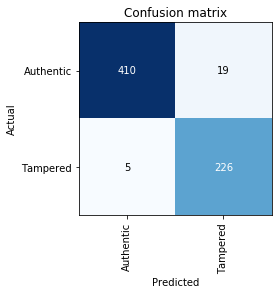

In [0]:
interp.plot_confusion_matrix()

Predictions

In [0]:
learn.export()

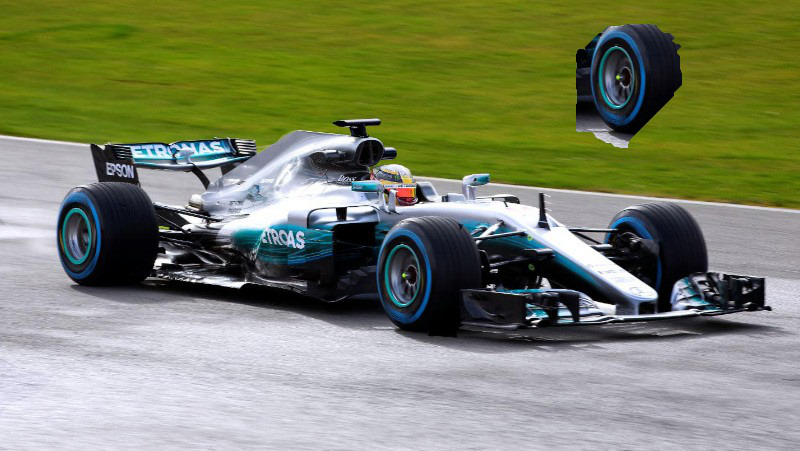

In [0]:
img = open_image(path/'f1.jpg')
img 

In [0]:
learn = load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category Authentic

In [0]:
learn.save('expirement2-weights')